In [1]:
!pip install -U emoji

Requirement already up-to-date: emoji in /anaconda3/lib/python3.7/site-packages (0.5.4)


In [2]:
!pip install -U nltk

Requirement already up-to-date: nltk in /anaconda3/lib/python3.7/site-packages (3.5)


In [3]:
!pip install -U textblob language_tool_python

Requirement already up-to-date: textblob in /anaconda3/lib/python3.7/site-packages (0.15.3)
  Attempting uninstall: language-tool-python
    Found existing installation: language-tool-python 2.3.0
    Uninstalling language-tool-python-2.3.0:
      Successfully uninstalled language-tool-python-2.3.0


In [5]:
%%time
%%bash

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     wget https://raw.githubusercontent.com/neomatrix369/awesome-ai-ml-dl/master/examples/better-nlp/library/org/neomatrix369/nlp_profiler.py
     mkdir -p better-nlp/library/org/neomatrix369/
     mv nlp_profiler.py better-nlp/library/org/neomatrix369/
  fi

  echo "Library source exists"
  cd better-nlp
fi
pwd

Library source found
/Users/swami/git-repos/ai-ml-dl-stuff/awesome-ai-ml-dl/examples/better-nlp/build
CPU times: user 4.79 ms, sys: 8.79 ms, total: 13.6 ms
Wall time: 19 ms


In [7]:
import sys
import pandas as pd

sys.path.insert(0, '../../library') # we need this when running inside the Docker container
sys.path.insert(0, './awesome-ai-ml-dl/examples/better-nlp/library') # we need this when running in Google Colab like environments
sys.path.insert(0, './better-nlp/library') # we need this when running in Google Colab like environments

from org.neomatrix369.nlp_profiler import apply_text_profiling

#### Text messages with Emojis, Numbers, Alphanumeric, None-alphanumeric, Punctuations, Dates and Duplicates

In [8]:
text_with_emojis = "I love ⚽ very much 😁."
text_with_a_number = '2833047 people live in this area. It is not a good area.'
text_with_two_numbers = '2833047 and 1111 people live in this area.'
text_with_punctuations = "This sentence doesn't seem to too many commas, periods or semi-colons (;)."
text_with_a_date = "Todays date is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020."
text_with_dates = "Todays date is 28/04/2020 and tomorrow's date is 29/04/2020."
text_with_duplicates = 'Everyone here is so hardworking. Hardworking people. I think hardworking people are a good trait in our company.'

In [9]:
data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

,text
0,I love ⚽ very much 😁.
1,2833047 people live in this area. It is not a ...
2,2833047 and 1111 people live in this area.
3,"This sentence doesn't seem to too many commas,..."
4,Todays date is 04/28/2020 for format mm/dd/yyy...
5,Todays date is 28/04/2020 and tomorrow's date ...
6,Everyone here is so hardworking. Hardworking p...


## Pandas describe() function

In [10]:
text_dataframe.describe()

,text
count,7
unique,7
top,Everyone here is so hardworking. Hardworking p...
freq,1


## NLP profiler's equivalent to that

In [11]:
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text')
profiled_text_dataframe.head()

params: {}


,text,sentiment_polarity_score,sentiment_polarity,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised,...,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
0,I love ⚽ very much 😁.,0.380000,Pretty positive,Positive,0.43,Objective/subjective,Subjective,1.000000,Very good,Good,...,4,0,16,2,0,13,8,1,1,0
1,2833047 people live in this area. It is not a ...,-0.106818,Pretty negative,Negative,0.55,Objective/subjective,Subjective,0.968802,Quite good,Good,...,11,2,45,0,1,43,13,2,5,0
2,2833047 and 1111 people live in this area.,0.136364,Pretty positive,Positive,0.50,Objective/subjective,Subjective,1.000000,Very good,Good,...,6,0,35,0,2,34,8,1,3,0
3,"This sentence doesn't seem to too many commas,...",0.375000,Pretty positive,Positive,0.75,Pretty subjective,Subjective,0.923887,Quite good,Good,...,13,0,63,0,0,56,18,7,4,0
4,Todays date is 04/28/2020 for format mm/dd/yyy...,0.000000,Neutral,Neutral,0.00,Very objective,Objective,0.711513,Pretty good,Good,...,9,0,56,0,6,48,16,8,3,1


### Sentiment Analysis

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


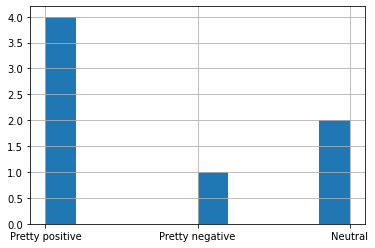

In [12]:
profiled_text_dataframe['sentiment_polarity'].hist()

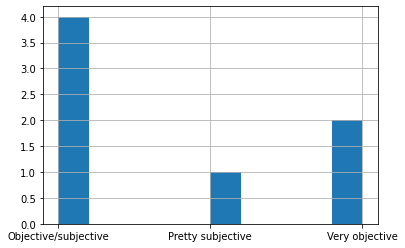

In [13]:
profiled_text_dataframe['sentiment_subjectivity'].hist()

### Spelling quality check

#### The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

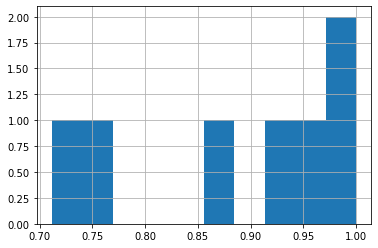

In [15]:
profiled_text_dataframe['spelling_quality_score'].hist()

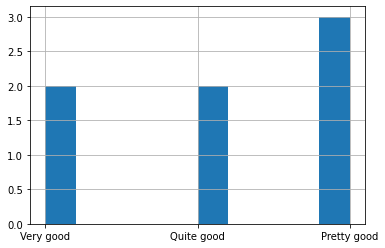

In [16]:
profiled_text_dataframe['spelling_quality'].hist()

### Running describe() on the new NLP profiler generated dataframe

In [17]:
profiled_text_dataframe.describe()

,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000
mean,0.212078,0.404286,0.887087,2.428571,61.285714,9.571429,9.857143,1.000000,51.714286,0.285714,2.142857,47.428571,13.857143,4.00000,3.714286,0.428571
std,0.285829,0.293193,0.118690,0.786796,28.182230,3.909695,4.670067,1.290994,24.560906,0.755929,2.734262,23.971213,4.634241,2.94392,1.889822,0.786796
min,-0.106818,0.000000,0.711513,2.000000,21.000000,5.000000,4.000000,0.000000,16.000000,0.000000,0.000000,13.000000,8.000000,1.00000,1.000000,0.000000
25%,0.000000,0.215000,0.802705,2.000000,49.000000,7.500000,7.000000,0.000000,40.000000,0.000000,0.000000,38.500000,10.500000,1.50000,3.000000,0.000000
50%,0.136364,0.500000,0.923887,2.000000,60.000000,8.000000,9.000000,0.000000,52.000000,0.000000,1.000000,46.000000,14.000000,3.00000,3.000000,0.000000
75%,0.377500,0.575000,0.984401,2.500000,69.000000,11.000000,12.000000,2.000000,59.500000,0.000000,4.000000,52.000000,17.000000,6.50000,4.500000,0.500000
max,0.700000,0.750000,1.000000,4.000000,112.000000,17.000000,18.000000,3.000000,95.000000,2.000000,6.000000,92.000000,20.000000,8.00000,7.000000,2.000000


### Resources

- https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
- https://textblob.readthedocs.io/en/dev/quickstart.html
- [Approaching (Almost) Any NLP Problem on Kaggle](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle)
- [Words of estimative probability](https://en.wikipedia.org/wiki/Words_of_estimative_probability)
- [NLP Profiler source file](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp/library/org/neomatrix369/nlp_profiler.py)
- [Kaggle Utility script](https://www.kaggle.com/neomatrix369/nlp-profiler-class)
- [Kaggle kernel](https://www.kaggle.com/neomatrix369/nlp-profiler-simple-dataset)
- [Awesome AI-ML-DL: Better NLP library](https://bit.ly/better-nlp-launch)
- [Awesome AI-ML-DL: NLP Resources](https://github.com/neomatrix369/awesome-ai-ml-dl/tree/master/natural-language-processing)
- [Awesome AI-ML-DL Github](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/)